In [1]:
import pandas as pd
import numpy as np

In [3]:
hr_df = pd.read_csv("F:/JupyterML/ML_Practice/datasets/HR_attrition.csv")

In [4]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
hr_df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [9]:
hr_df.isnull().any().sum()

0

# Exploratory Analysis

In [27]:
hr_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [37]:
hr_left_df = pd.DataFrame(hr_df.Attrition.value_counts())
hr_left_df['flag'] = range(0,len(hr_left_df))
hr_left_df
#hr_left_df.index


,Attrition,flag
No,1233,0
Yes,237,1


In [12]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

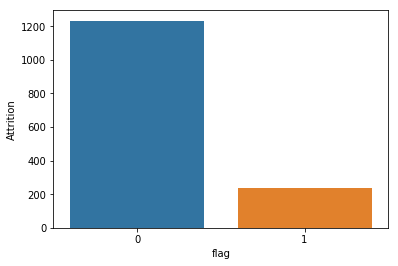

In [40]:
sns.barplot(hr_left_df.flag,hr_left_df.Attrition)

In [44]:
def alert(c):
  if c['Attrition'] == 'No':
    return 0
  else:
    return 1

In [45]:
hr_df['attrition_flag'] = hr_df.apply(alert, axis=1)

In [47]:
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition_flag
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


In [49]:
work_env_count = hr_df[['EnvironmentSatisfaction', 'attrition_flag']].groupby(['EnvironmentSatisfaction', 'attrition_flag']).size().reset_index()
work_env_count.columns = ['EnvironmentSatisfaction', 'attrition_flag', 'count']
work_env_count.head(4)


,EnvironmentSatisfaction,attrition_flag,count
0,1,0,212
1,1,1,72
2,2,0,244
3,2,1,43


In [65]:
work_env_count = hr_df[['EnvironmentSatisfaction', 'attrition_flag']].groupby(['EnvironmentSatisfaction', 'attrition_flag']).size()
work_env_percent = work_env_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
work_env_percent.columns = ['EnvironmentSatisfaction', 'attrition_flag', 'percent']
work_env_percent.head(4)

,EnvironmentSatisfaction,attrition_flag,percent
0,1,0,0.746479
1,1,1,0.253521
2,2,0,0.850174
3,2,1,0.149826


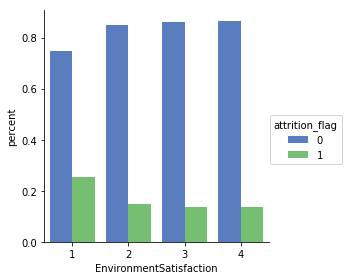

In [67]:
sns.factorplot(x="EnvironmentSatisfaction", y = 'percent', hue="attrition_flag", data=work_env_percent,
               size=4, kind="bar", palette="muted")

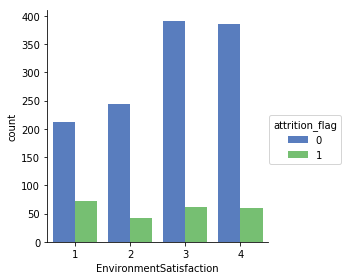

In [51]:
sns.factorplot(x="EnvironmentSatisfaction", y = 'count', hue="attrition_flag", data=work_env_count,
               size=4, kind="bar", palette="muted")

In [53]:
work_sat_count = hr_df[['JobSatisfaction', 'attrition_flag']].groupby(['JobSatisfaction', 'attrition_flag']).size().reset_index()
work_sat_count.columns = ['JobSatisfaction', 'attrition_flag', 'count']
work_sat_count.head(4)

,JobSatisfaction,attrition_flag,count
0,1,0,223
1,1,1,66
2,2,0,234
3,2,1,46


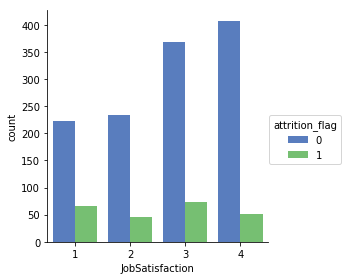

In [56]:
sns.factorplot(x="JobSatisfaction", y = 'count', hue="attrition_flag", data=work_sat_count,
               size=4, kind="bar", palette="muted")

In [69]:
work_sat_count = hr_df[['JobSatisfaction', 'attrition_flag']].groupby(['JobSatisfaction', 'attrition_flag']).size()
work_sat_percent = work_sat_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
work_sat_percent.columns = ['JobSatisfaction', 'attrition_flag', 'percent']
work_sat_percent.head(4)

,JobSatisfaction,attrition_flag,percent
0,1,0,0.771626
1,1,1,0.228374
2,2,0,0.835714
3,2,1,0.164286


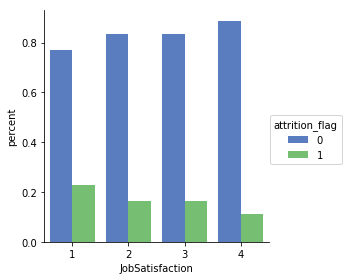

In [70]:
sns.factorplot(x="JobSatisfaction", y = 'percent', hue="attrition_flag", data=work_sat_percent,
               size=4, kind="bar", palette="muted")

In [60]:
work_performance_count = hr_df[['PerformanceRating','attrition_flag']].groupby(['PerformanceRating','attrition_flag']).size().reset_index()
work_performance_count.columns = ['PerformanceRating', 'attrition_flag', 'count']
work_performance_count.head(4)


,PerformanceRating,attrition_flag,count
0,3,0,1044
1,3,1,200
2,4,0,189
3,4,1,37


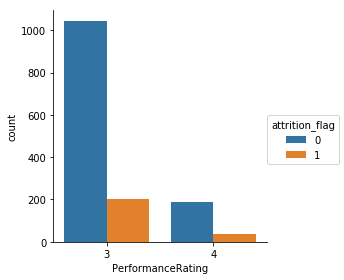

In [63]:
sns.factorplot(x='PerformanceRating',y='count',hue='attrition_flag',data =work_performance_count,kind='bar' )

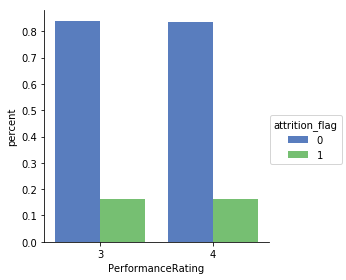

In [72]:
work_per_count = hr_df[['PerformanceRating', 'attrition_flag']].groupby(['PerformanceRating', 'attrition_flag']).size()
work_per_percent = work_per_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
work_per_percent.columns = ['PerformanceRating', 'attrition_flag', 'percent']
work_per_percent.head(4)

sns.factorplot(x="PerformanceRating", y = 'percent', hue="attrition_flag", data=work_per_percent,
               size=4, kind="bar", palette="muted")

# Average satisfaction levels for people who leave and stay back in the company

In [73]:
sl_left_mean = np.mean( hr_df[hr_df.attrition_flag == 1]['JobSatisfaction'] )
sl_left_mean

2.4683544303797467

In [74]:
sl_left_std = np.std( hr_df[hr_df.attrition_flag == 1]['JobSatisfaction'] )
sl_left_std

1.1156967099712658

In [75]:
sl_retain_mean = np.mean( hr_df[hr_df.attrition_flag == 0]['JobSatisfaction'] )
sl_retain_mean

2.778588807785888

In [77]:
sl_retain_std = np.std( hr_df[hr_df.attrition_flag == 0]['JobSatisfaction'] )
sl_retain_std

1.092833970187339

In [78]:
env_left_mean = np.mean( hr_df[hr_df.attrition_flag == 1]['EnvironmentSatisfaction'] )
env_left_mean


2.4641350210970465

In [79]:
env_left_std = np.std( hr_df[hr_df.attrition_flag == 1]['EnvironmentSatisfaction'] )
env_left_std

1.1673207587981993

In [80]:
env_retain_mean = np.mean( hr_df[hr_df.attrition_flag == 0]['EnvironmentSatisfaction'] )
env_retain_mean

2.7712895377128954

In [81]:
env_retain_std = np.std( hr_df[hr_df.attrition_flag == 0]['EnvironmentSatisfaction'] )
env_retain_std

1.0706978455322718

In [82]:
relsas_left_mean = np.mean( hr_df[hr_df.attrition_flag == 1]['RelationshipSatisfaction'] )
relsas_left_mean

2.5991561181434597

In [83]:
relsas_retain_mean = np.mean( hr_df[hr_df.attrition_flag == 0]['RelationshipSatisfaction'] )
relsas_retain_mean

2.7339821573398218

# Hypothesis Test: Does lower satisfaction levels lead to people leaving the company

H0 : Average satisfaction level of people leaving is same as average satisfaction of people staying

H1 : Average satisfaction level of people leaving is less than as average satisfaction of people staying

In [96]:
from scipy import stats
stats_value,p_value =stats.ttest_ind(hr_df[hr_df.attrition_flag == 0]['JobSatisfaction'],hr_df[hr_df.attrition_flag == 1]['JobSatisfaction'])

In [97]:
p_value

7.043066741731151e-05

In [98]:
print (format(p_value, 'f'))

0.000070


# How time spent in company influences attrition?

In [101]:
time_spend_count = hr_df[['TotalWorkingYears', 'attrition_flag']].groupby(['TotalWorkingYears', 'attrition_flag']).size()
time_spend_percent = time_spend_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
time_spend_percent.columns = ['TotalWorkingYears', 'attrition_flag', 'percent']

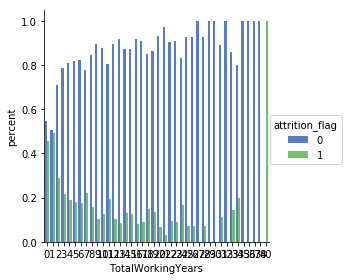

In [105]:
sns.factorplot(x="TotalWorkingYears", y = 'percent', hue="attrition_flag", data=time_spend_percent,
               size=4, kind="bar", palette="muted")

# Which department has maximum attrition

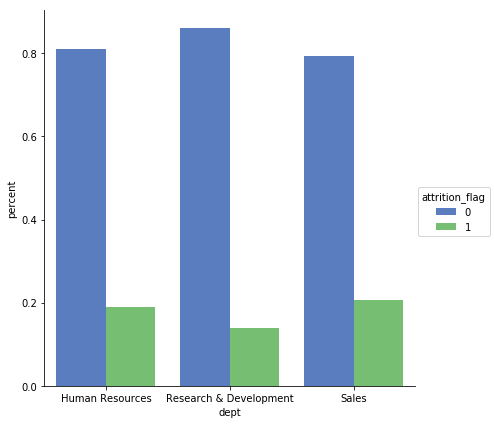

In [110]:
dept_count = hr_df[['Department', 'attrition_flag']].groupby(['Department', 'attrition_flag']).size()
dept_count_percent = dept_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
dept_count_percent.columns = ['dept', 'attrition_flag', 'percent']
sns.factorplot(x = 'dept',
            y="percent",
            hue="attrition_flag",
            data = dept_count_percent,
            size=6,
            kind="bar",
            palette="muted")

# Role change in organisation and its effect

In [111]:

pd.crosstab( hr_df.YearsSinceLastPromotion, hr_df.attrition_flag )

attrition_flag,0,1
YearsSinceLastPromotion,,
0,471,110
1,308,49
2,132,27
3,43,9
4,56,5
5,43,2
6,26,6
7,60,16
8,18,0


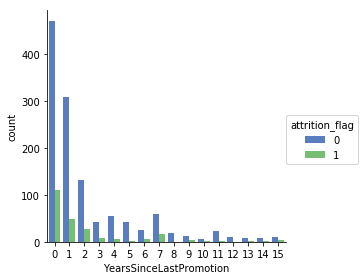

In [113]:
sns.factorplot(x="YearsSinceLastPromotion", hue = 'attrition_flag', data=hr_df,
               size=4, kind="count", palette="muted")

In [114]:
pd.crosstab(hr_df.YearsInCurrentRole, hr_df.attrition_flag)

attrition_flag,0,1
YearsInCurrentRole,,
0,171,73
1,46,11
2,304,68
3,119,16
4,89,15
5,35,1
6,35,2
7,191,31
8,82,7


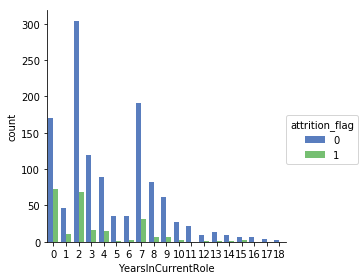

In [115]:
sns.factorplot(x="YearsInCurrentRole", hue = 'attrition_flag', data=hr_df,
               size=4, kind="count", palette="muted")

# Lets check corrleation between Variables

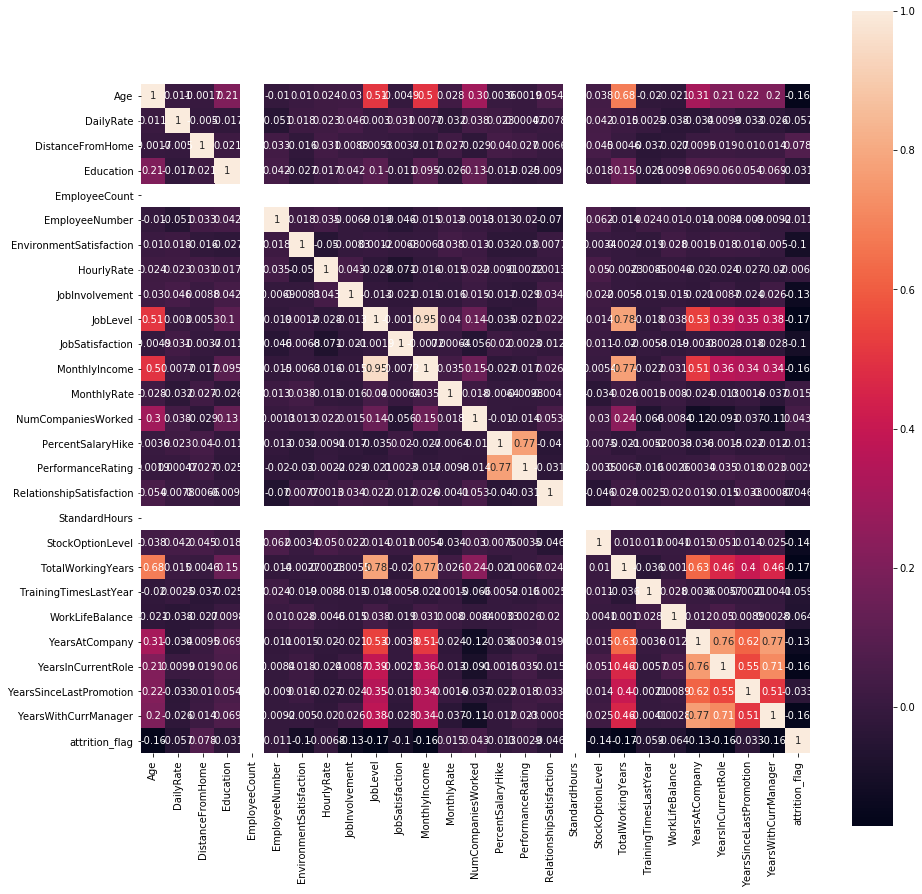

In [121]:
corrmat = hr_df.corr()
f, ax = plt.pyplot.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=1, square=True, annot=True)
plt.pyplot.show()